<a href="https://colab.research.google.com/github/itee26/fintech_project/blob/main/proj_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
ongc=yf.Ticker("ONGC.NS")
ongc.info
ongc.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-23 00:00:00+05:30,143.879655,144.398398,142.747861,143.691025,16742252,0.0,0.0
2023-01-24 00:00:00+05:30,143.691025,144.492705,142.983652,143.502380,8276792,0.0,0.0
2023-01-25 00:00:00+05:30,142.653546,144.681342,142.559223,143.785339,9827342,0.0,0.0
2023-01-27 00:00:00+05:30,143.785354,145.388730,138.267853,139.258163,13052535,0.0,0.0
2023-01-30 00:00:00+05:30,139.116676,140.389953,135.108229,136.664444,12688399,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,234.949997,238.949997,231.100006,235.100006,34505065,0.0,0.0
2024-01-17 00:00:00+05:30,232.199997,237.250000,230.699997,232.050003,26010955,0.0,0.0
2024-01-18 00:00:00+05:30,230.050003,234.500000,224.649994,233.550003,19232183,0.0,0.0


                                Close       SMA20
Date                                             
2023-01-23 00:00:00+05:30  143.691040         NaN
2023-01-24 00:00:00+05:30  143.502396         NaN
2023-01-25 00:00:00+05:30  143.785339         NaN
2023-01-27 00:00:00+05:30  139.258148         NaN
2023-01-30 00:00:00+05:30  136.664444         NaN
...                               ...         ...
2024-01-16 00:00:00+05:30  235.100006  200.965300
2024-01-17 00:00:00+05:30  232.050003  201.916737
2024-01-18 00:00:00+05:30  233.550003  202.834092
2024-01-19 00:00:00+05:30  242.050003  203.923389
2024-01-23 00:00:00+05:30  229.899994  204.727936

[246 rows x 2 columns]


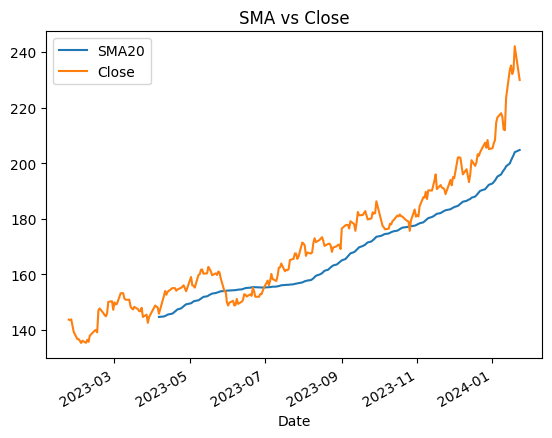

In [ ]:
ongc_sma=ongc.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
ongc_sma=ongc_sma['Close'].to_frame()
ongc_sma['SMA20']=ongc_sma.rolling(50).mean()
ongc_sma[['SMA20', 'Close']].plot(title="SMA vs Close")
print (ongc_sma)

                                Close       EMA20
Date                                             
2023-01-23 00:00:00+05:30  143.691040  143.691040
2023-01-24 00:00:00+05:30  143.502396  143.592002
2023-01-25 00:00:00+05:30  143.785339  143.662994
2023-01-27 00:00:00+05:30  139.258148  142.391383
2023-01-30 00:00:00+05:30  136.664444  141.006085
...                               ...         ...
2024-01-16 00:00:00+05:30  235.100006  213.907093
2024-01-17 00:00:00+05:30  232.050003  215.634989
2024-01-18 00:00:00+05:30  233.550003  217.341181
2024-01-19 00:00:00+05:30  242.050003  219.694402
2024-01-23 00:00:00+05:30  229.899994  220.666363

[246 rows x 2 columns]


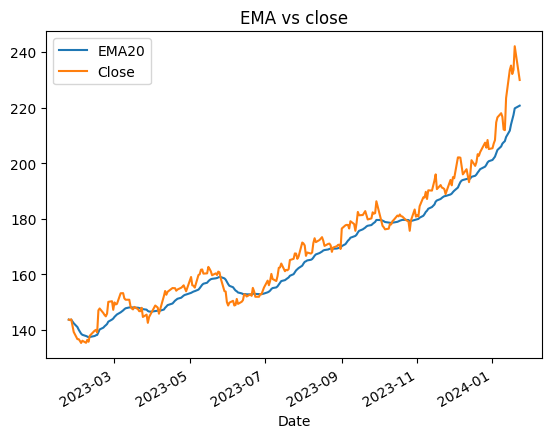

In [ ]:
ongc_ema=ongc.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
ongc_ema=ongc_ema['Close'].to_frame()
ongc_ema['EMA20']=ongc_ema.ewm(span=20).mean()
ongc_ema[['EMA20','Close']].plot(title="EMA vs close")
print(ongc_ema)

In [ ]:
price=yf.download('ONGC.NS',start="2023-03-03",end="2024-01-01")['Close']
def calc_rsi(price):
 closing_price=price.diff()
 gain=closing_price.where(closing_price>0,0)
 loss=-closing_price.where(closing_price<0,0)
 avg_gain=gain.rolling(window=14).mean()
 avg_loss=loss.rolling(window=14).mean()
 rs=avg_gain/avg_loss
 rsi=100-(100/(1+rs))
 return rsi
print(calc_rsi(price))

[*********************100%%**********************]  1 of 1 completed

Date
2023-03-03          NaN
2023-03-06          NaN
2023-03-08          NaN
2023-03-09          NaN
2023-03-10          NaN
                ...    
2023-12-22    53.321663
2023-12-26    58.281243
2023-12-27    55.341249
2023-12-28    64.071853
2023-12-29    63.501476
Name: Close, Length: 202, dtype: float64


                                Close      MACD
Date                                           
2023-01-23 00:00:00+05:30  143.691025  0.000000
2023-01-24 00:00:00+05:30  143.502380 -0.004232
2023-01-25 00:00:00+05:30  143.785339  0.003382
2023-01-27 00:00:00+05:30  139.258163 -0.156690
2023-01-30 00:00:00+05:30  136.664444 -0.343582
...                               ...       ...
2024-01-16 00:00:00+05:30  235.100006  7.857206
2024-01-17 00:00:00+05:30  232.050003  8.321911
2024-01-18 00:00:00+05:30  233.550003  8.710817
2024-01-19 00:00:00+05:30  242.050003  9.594310
2024-01-23 00:00:00+05:30  229.899994  9.207937

[246 rows x 2 columns]


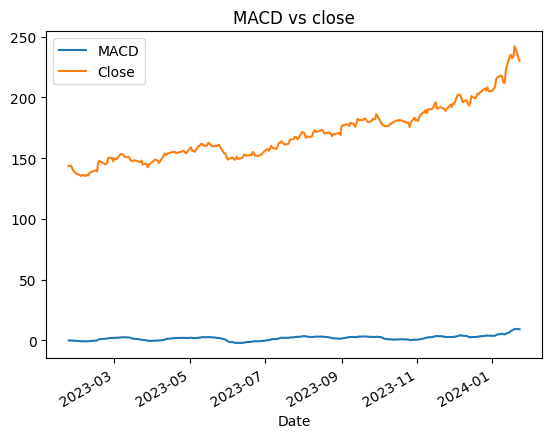

In [ ]:
ongc_macd=ongc.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
ongc_macd=ongc_macd['Close'].to_frame()
ongc_macd["MACD"]=ongc_macd.ewm(span=12).mean()-ongc_macd.ewm(span=26).mean()
ongc_macd[['MACD','Close']].plot(title="MACD vs close")
print(ongc_macd)

                                Close       SMA20        BOLU        BOLD
Date                                                                     
2023-01-23 00:00:00+05:30  143.691040         NaN         NaN         NaN
2023-01-24 00:00:00+05:30  143.502396         NaN         NaN         NaN
2023-01-25 00:00:00+05:30  143.785339         NaN         NaN         NaN
2023-01-27 00:00:00+05:30  139.258148         NaN         NaN         NaN
2023-01-30 00:00:00+05:30  136.664444         NaN         NaN         NaN
...                               ...         ...         ...         ...
2024-01-16 00:00:00+05:30  235.100006  211.932500  231.313290  192.551711
2024-01-17 00:00:00+05:30  232.050003  213.520000  234.055808  192.984193
2024-01-18 00:00:00+05:30  233.550003  215.037501  236.810538  193.264464
2024-01-19 00:00:00+05:30  242.050003  217.007501  241.070648  192.944355
2024-01-23 00:00:00+05:30  229.899994  218.305001  242.201551  194.408451

[246 rows x 4 columns]


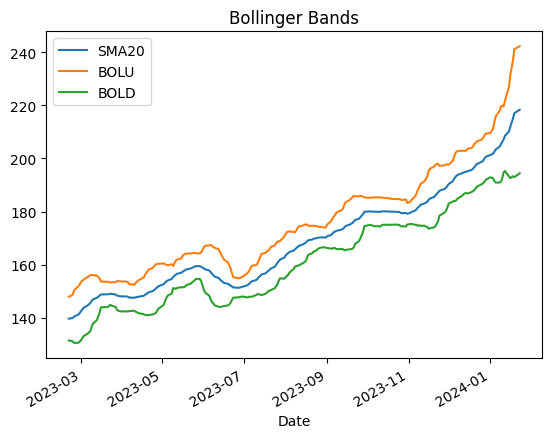

In [ ]:
ongc_bol=ongc.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
ongc_bol=ongc_bol['Close'].to_frame()
ongc_bol=ongc_bol.assign(SMA20=ongc_bol.rolling(20).mean(),
                         BOLU=ongc_bol.rolling(20).mean()+2*ongc_bol.rolling(20).std(),
                         BOLD=ongc_bol.rolling(20).mean()-2*ongc_bol.rolling(20).std())
ongc_bol[['SMA20','BOLU','BOLD']].plot(title="Bollinger Bands")
print(ongc_bol)